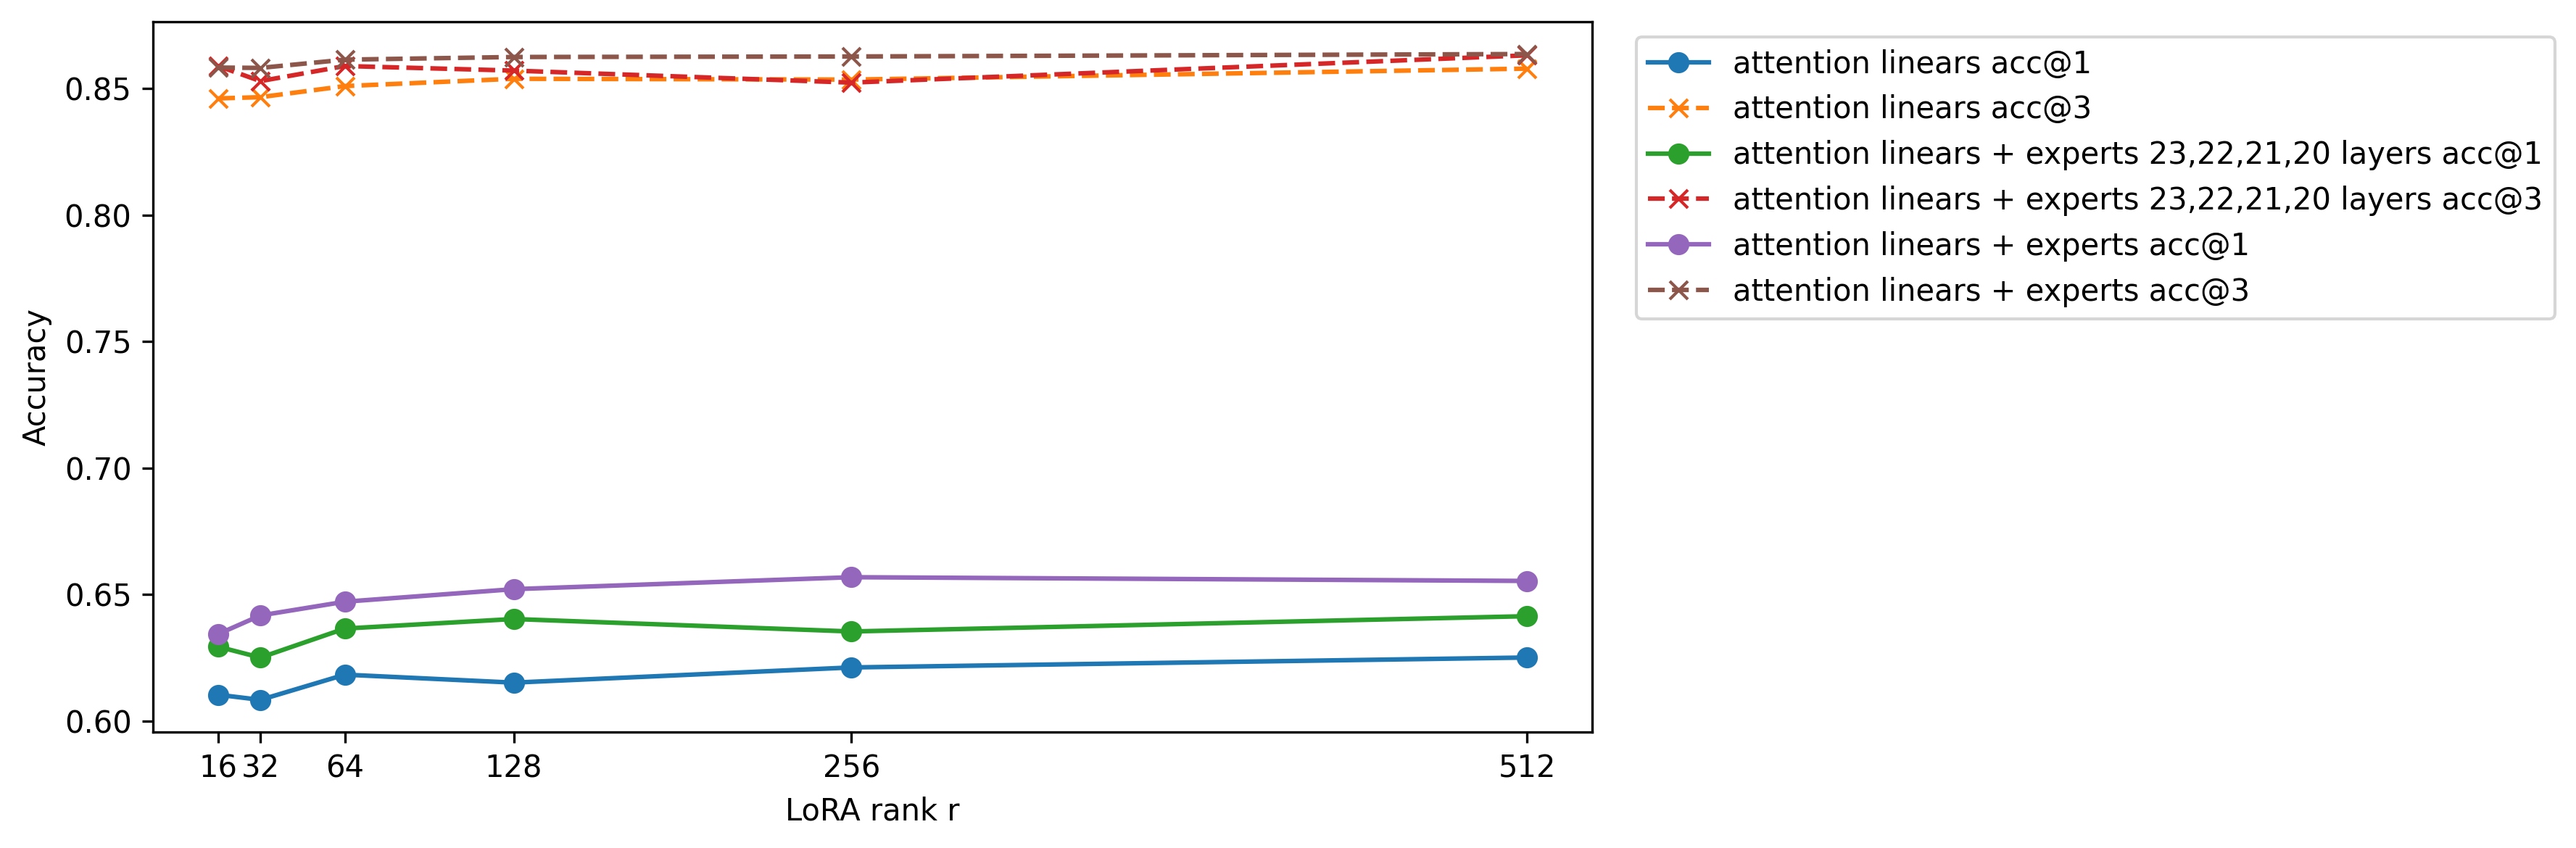

In [2]:
import matplotlib.pyplot as plt

data = [
    ("r16", "merged", 0.6103171980835949, 0.8461093672559061),
    ("r32", "merged", 0.6082934082273252, 0.8466049892615232),
    ("r64", "merged", 0.6182629166150415, 0.850989138066328),
    ("r128", "merged", 0.6151082108045597, 0.8538741120105733),
    ("r256", "merged", 0.6211126254491389, 0.8535497460042126),
    ("r512", "merged", 0.6250361376120266, 0.8578862594474043),
    
    ("r16", "selected-experts-merged", 0.629303022607406, 0.8589053243449503),
    ("r32", "selected-experts-merged", 0.6250065221231116, 0.8529520182308594),
    ("r64", "selected-experts-merged", 0.6364910647708194, 0.858919874036886),
    ("r128", "selected-experts-merged", 0.6402655283122682, 0.8571110205773401),
    ("r256", "selected-experts-merged", 0.6353309025008675, 0.852354999673496),
    ("r512", "selected-experts-merged", 0.6413802860657054, 0.8631494323019757),
    
    ("r16", "experts-merged", 0.634314734280455, 0.8582938145574097),
    ("r32", "experts-merged", 0.6416693322079874, 0.8581746988026246),
    ("r64", "experts-merged", 0.6471089793742315, 0.8614358562065642),
    ("r128", "experts-merged", 0.6520684690823646, 0.8624851960809614),
    ("r256", "experts-merged", 0.6567909362295493, 0.8626887622784803),
    ("r512", "experts-merged", 0.6553193132807913, 0.8636579233244328),
]

replace = {
    "experts-merged": "attention linears + experts",
    "merged": "attention linears",
    'selected-experts-merged': "attention linears + experts 23,22,21,20 layers"
}

def r_to_int(r):
    return int(r.replace("r", ""))

categories = {}
for r, cat, acc1, acc3 in data:
    cat = replace[cat]
    categories.setdefault(cat, [])
    categories[cat].append((r_to_int(r), acc1, acc3))

plt.figure(figsize=(12, 4), dpi=300)

for cat, vals in categories.items():
    vals = sorted(vals, key=lambda x: x[0])
    r_vals = [v[0] for v in vals]
    acc1_vals = [v[1] for v in vals]
    acc3_vals = [v[2] for v in vals]

    plt.plot(r_vals, acc1_vals, marker="o", label=f"{cat} acc@1")
    plt.plot(r_vals, acc3_vals, marker="x", linestyle="--", label=f"{cat} acc@3")

plt.xlabel("LoRA rank r")
plt.ylabel("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))
r_ticks = [16, 32, 64, 128, 256, 512]
plt.xticks(r_ticks)
plt.tight_layout()
plt.show()